In [1]:
import numpy as np 
from datetime import datetime
from tqdm import tqdm # tqdm is a useful library for timing for-loops 
import matplotlib.pyplot as plt 

# Solve_timed function for computing how long it takes to solve a 
# linear system using numpy 
def solve_timed(A, b):
    # computes the time when the computation is started
    start_time = datetime.now() 
    # runs the linear solve 
    x = np.linalg.solve(A,b)
    # Computes how long the computation took 
    time_delta = datetime.now() - start_time 
    # returns the result and the total number of seconds the solve took 
    return x, time_delta.total_seconds()

In [2]:
# PARAMETERS - CHANGE THESE 
num_trials = 10 # Number of distinct linear solves to time 
min_size = 1000 # Dimension of the smallest linear solve
max_size = 20000 # Dimension of the largest linear solve 

In [3]:
# Create a vector of num_trials logarithmically spaced points between min_size and max_size
# to denote the size of each linear system solve 
Ns = np.logspace(np.log10(min_size), np.log10(max_size), num_trials, dtype = np.int64)
# Create a vector to store how long it takes each linear solve to complete
compute_times = np.zeros(num_trials)
# Set the random seed at each iteration so the runs are repeatable 
np.random.seed(42)
# Iterate through the problem sizes 
for i, N in tqdm(enumerate(Ns), total = num_trials): 


    # Form a random A and B matrix 
    # We use np.eye(N) to make sure A is invertible and better conditioned
    A = np.random.randn(N,N) + 1e-2*np.eye(N) 
    b = np.random.randn(N,1)
    # We solve the system using the provided solve_timed function 
    _, seconds = solve_timed(A,b)
    compute_times[i] = seconds

100%|██████████| 10/10 [00:44<00:00,  4.48s/it]


Text(0.5, 1.0, 'Log(Compute Time) vs. Log(Problem Size)')

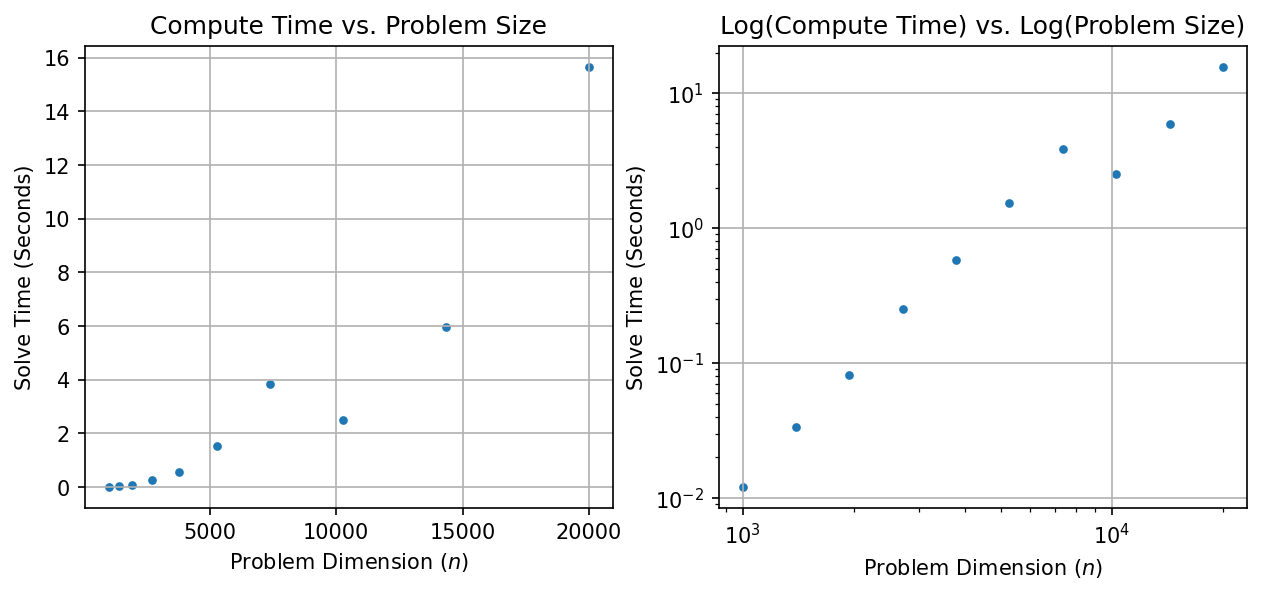

: 

In [ ]:
# Create a figure with width=10in , height=4in, dpi/resolution (dots per inch) = 150
plt.figure(figsize=(10,4), dpi=150)

# Plot a linear graph on the first subplot 
plt.subplot(1,2,1)
plt.scatter(Ns, compute_times, s = 10.0)
plt.grid() 
plt.xlabel("Problem Dimension ($n$)")
plt.ylabel("Solve Time (Seconds)")
plt.title("Compute Time vs. Problem Size")

# Plot the same graph with logarithmically scaled axes on the second subplot
plt.subplot(1,2,2)
plt.scatter(Ns, compute_times, s = 10.0)
plt.xscale('log')
plt.yscale('log')
plt.grid() 
plt.xlabel("Problem Dimension ($n$)")
plt.ylabel("Solve Time (Seconds)")
plt.title("Log(Compute Time) vs. Log(Problem Size)")